## Image Caption Generator

We are going to use Transformers model to generate caption from an Image.

### Installation



1.   Transformers
2.   Pytorch
3. Image

In Colab, Pytorch comes preinstalled and same goes with PIL for Image. You will only need to install **transformers** from Huggingface.




In [ ]:
!pip install transformers

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, ViTFeatureExtractor
import torch
from PIL import Image

##Requirements

####Before running the pretrained model i have installed
1. transformers package
2. PIL
3. torch


These packages can provide us with VisionEncoderDecoderModel, ViTFeatureExtractor, ViTFeatureExtractor

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

predict_step(["/content/36422830_55c844bc2d.jpg"])

['a red and white truck parked on top of a dirt field']

##The first three codes on top installs required models (vit-gpt2-image-captioning), its tokenizers and config files

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Enter the path of the image file: /content/img.jpeg


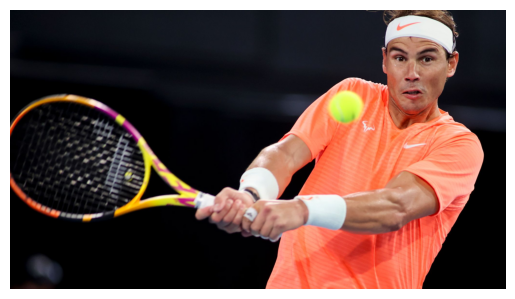

Caption: a man holding a tennis racquet on top of a tennis court


In [5]:
# Importing necessary libraries
import torch
from PIL import Image
from transformers import ViTFeatureExtractor, VisionEncoderDecoderModel, AutoTokenizer
import matplotlib.pyplot as plt

# Load the Vision Encoder-Decoder model and related components from Hugging Face Transformers
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Check if a GPU is available, otherwise use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set parameters for caption generation
max_length = 16  # Maximum length of the generated caption
num_beams = 4    # Number of beams for beam search during generation
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

# Function to predict and display the caption for an image
def predict_step(image_path):
    try:
        # Open the image file
        i_image = Image.open(image_path)
        # Convert the image to RGB if it's not in RGB mode
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        # Display the image using matplotlib
        plt.imshow(i_image)
        plt.axis('off')
        plt.show()

        # Use ViTImageProcessor to extract features from the image
        pixel_values = feature_extractor(images=[i_image], return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(device)

        # Generate a caption for the image using the Vision Encoder-Decoder model
        output_ids = model.generate(pixel_values, **gen_kwargs)

        # Decode the generated token IDs into text, skipping special tokens
        preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        preds = [pred.strip() for pred in preds]

        # Print the predicted caption below the displayed image
        print("Caption:", preds[0])
    except FileNotFoundError:
        print("Error: The specified image file was not found.")
    except Exception as e:
        # Handle any other errors that may occur during the process
        print(f"Unexpected error: {type(e).__name__} - {str(e)}")

# Main execution block
if __name__ == "__main__":
    try:
        # Prompt the user to input the path of the image file
        image_path = input("Enter the path of the image file: ")

        # Call the predict_step function with the provided image path
        predict_step(image_path)
    except KeyboardInterrupt:
        # Handle keyboard interruption (Ctrl+C) gracefully
        print("\nUser interrupted the execution.")
    except Exception as e:
        # Handle unexpected errors and display an informative message
        print(f"Unexpected error: {type(e).__name__} - {str(e)}")



#Here the code performes the image alt text generations

The code provides a prompt to provide the image link and a input to add a link of thr image.

Checks for correct link or else it provides a error.

I added a specific FileNotFoundError exception to handle cases where the specified image file is not found.

The general Exception block now provides more details about the type of unexpected error that occurred. This can be useful for debugging.